## Question 3: What is the relationship between yr_built vs grade? 
### At What Age is Considered "Desirablely Old"?

## Part 1: Import Libraries and Cleaned Dataset
In this section, the necessary libraries, along with the cleaned dataset were imported. 

In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
data = pd.read_csv('kc_house_data_cleaned.csv')
df = pd.DataFrame(data)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1180,0.0,1955,0.0,98178
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,400.0,1951,1991.0,98125
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,3,6,770,0.0,1933,0.0,98028
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,910.0,1965,0.0,98136
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,0.0,1987,0.0,98074


## Part 2: Exploratory Data Anaylsis
In this section, we revist the correlations between the dependent and independent variables , and then more specifically we extract the variables that will be used to address the question above and inspect their relationships visually and statistically.



In [35]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode
price,1.000000,0.315961,0.525915,0.701929,0.089879,0.256820,0.264308,0.036031,0.667964,0.605392,0.321103,0.053965,0.117858,-0.053409
bedrooms,0.315961,1.000000,0.527870,0.593178,0.033602,0.183707,-0.002054,0.023440,0.366174,0.492543,0.303517,0.160736,0.018626,-0.158588
bathrooms,0.525915,0.527870,1.000000,0.755755,0.088368,0.502574,0.063628,-0.126443,0.665834,0.686664,0.278504,0.507166,0.047173,-0.204778
sqft_living,0.701929,0.593178,0.755755,1.000000,0.173449,0.353941,0.104635,-0.059397,0.762776,0.876448,0.428683,0.318140,0.051056,-0.199793
sqft_lot,0.089879,0.033602,0.088368,0.173449,1.000000,-0.004824,0.021458,-0.008806,0.114726,0.184134,0.015038,0.052939,0.004977,-0.129582
floors,0.256820,0.183707,0.502574,0.353941,-0.004824,1.000000,0.020794,-0.264013,0.458783,0.523970,-0.241845,0.489175,0.003785,-0.059522
waterfront,0.264308,-0.002054,0.063628,0.104635,0.021458,0.020794,1.000000,0.016659,0.082817,0.071776,0.083053,-0.024491,0.073938,0.028925
condition,0.036031,0.023440,-0.126443,-0.059397,-0.008806,-0.264013,0.016659,1.000000,-0.146854,-0.158826,0.168431,-0.361555,-0.055795,0.002835
grade,0.667964,0.366174,0.665834,0.762776,0.114726,0.458783,0.082817,-0.146854,1.000000,0.756069,0.165863,0.447854,0.015618,-0.185761
sqft_above,0.605392,0.492543,0.686664,0.876448,0.184134,0.523970,0.071776,-0.158826,0.756069,1.000000,-0.051149,0.424017,0.020637,-0.261557


In [36]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode'],
      dtype='object')

In [37]:
q3_var = [ 'price', 'condition', 'grade', 'yr_built', 'yr_renovated']
q3_df = df[q3_var]
q3_df.corr()

,price,condition,grade,yr_built,yr_renovated
price,1.000000,0.036031,0.667964,0.053965,0.117858
condition,0.036031,1.000000,-0.146854,-0.361555,-0.055795
grade,0.667964,-0.146854,1.000000,0.447854,0.015618
yr_built,0.053965,-0.361555,0.447854,1.000000,-0.202565
yr_renovated,0.117858,-0.055795,0.015618,-0.202565,1.000000


In [38]:
#Grade vs Yr_Built 

grade_build = df.groupby('yr_built')['grade'].mean()
grade_build.head()

yr_built
1900    6.873563
1901    7.034483
1902    7.444444
1903    6.869565
1904    6.911111
Name: grade, dtype: float64

Text(0, 0.5, 'Grade')

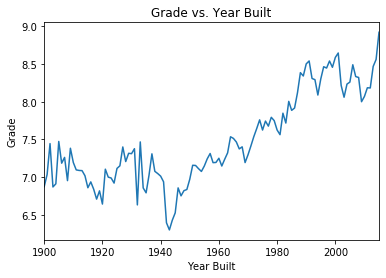

In [40]:
grade_build.plot()
plt.title('Grade vs. Year Built')
plt.xlabel('Year Built')
plt.ylabel('Grade')

yr_built and grade had a (positive) correlation of 0.447854. This is low. Homes built in the years 1920-1911 had the lowest grades, and lowest average price sold.


In [41]:
df = df.groupby(['grade', 'yr_built']).mean()
df.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
grade yr_built                                                                 
3     1920      262000.0       1.0       0.75        520.0   12981.0     1.0   
4     1900      130000.0       2.0       1.00        600.0    1500.0     1.0   
      1912       90000.0       1.5       0.75        545.0    5145.0     1.0   
      1914      248000.0       2.0       1.00        770.0    8600.0     1.0   
      1918       95000.0       2.0       1.00        960.0    7000.0     1.0   

                waterfront  condition  sqft_above  sqft_basement  \
grade yr_built                                                     
3     1920             0.0        5.0       520.0            0.0   
4     1900             0.0        4.0       600.0            0.0   
      1912             0.0        3.0       545.0            0.0   
      1914             0.0        4.0       770.0            0.0   
      1918             0.0        3.0       960.0            0.0   

                yr_renovated  zipcode  
grade yr_built                         
3     1920               0.0  98022.0  
4     1900               0.0  98027.0  
      1912               0.0  98023.0  
      1914               0.0  98027.0  
      1918               0.0  98198.0

In [42]:
df = df.groupby(['grade', 'yr_built']).median()
df.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
grade yr_built                                                                 
3     1920      262000.0       1.0       0.75        520.0   12981.0     1.0   
4     1900      130000.0       2.0       1.00        600.0    1500.0     1.0   
      1912       90000.0       1.5       0.75        545.0    5145.0     1.0   
      1914      248000.0       2.0       1.00        770.0    8600.0     1.0   
      1918       95000.0       2.0       1.00        960.0    7000.0     1.0   

                waterfront  condition  sqft_above  sqft_basement  \
grade yr_built                                                     
3     1920             0.0        5.0       520.0            0.0   
4     1900             0.0        4.0       600.0            0.0   
      1912             0.0        3.0       545.0            0.0   
      1914             0.0        4.0       770.0            0.0   
      1918             0.0        3.0       960.0            0.0   

                yr_renovated  zipcode  
grade yr_built                         
3     1920               0.0  98022.0  
4     1900               0.0  98027.0  
      1912               0.0  98023.0  
      1914               0.0  98027.0  
      1918               0.0  98198.0

In [43]:
yr_grade = df.groupby(['grade', 'yr_built'])['price'].mean()
yr_grade.head(20)

grade  yr_built
3      1920        262000.000000
4      1900        130000.000000
       1912         90000.000000
       1914        248000.000000
       1918         95000.000000
       1920        152000.000000
       1924        330000.000000
       1926        140000.000000
       1931        352000.000000
       1932        230000.000000
       1934        217000.000000
       1936        435000.000000
       1937        247000.000000
       1942        205000.000000
       1945        169333.333333
       1946        355000.000000
       1947        123000.000000
       1948        145000.000000
       1949        190025.000000
       1950        252500.000000
Name: price, dtype: float64

Text(0, 0.5, 'Average Home Price')

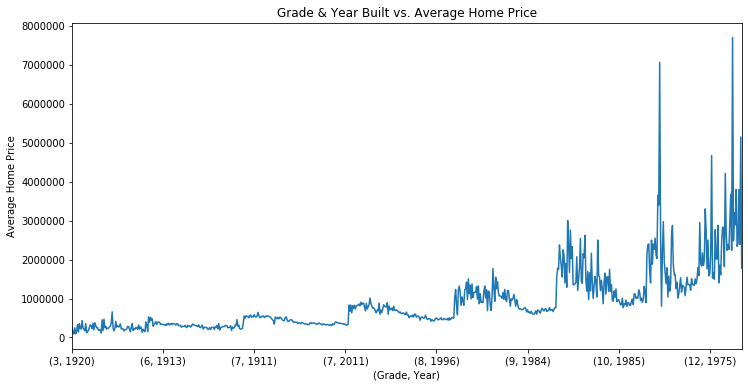

In [44]:
yr_grade.plot(figsize = (12,6))
plt.title('Grade & Year Built vs. Average Home Price')
plt.xlabel('(Grade, Year)')
plt.ylabel('Average Home Price')


Yr_built and grade had a low (positive) correlation of 0.447854. Homes built in the years 1920-1911 had the lowest grades, and lowest average price sold. Homes built in the year 1984-1975 had the highest grades and average home prices. Homes from the mid 70s to early 80's are considered to be 'vintage'.

Text(0, 0.5, 'Average Home Price')

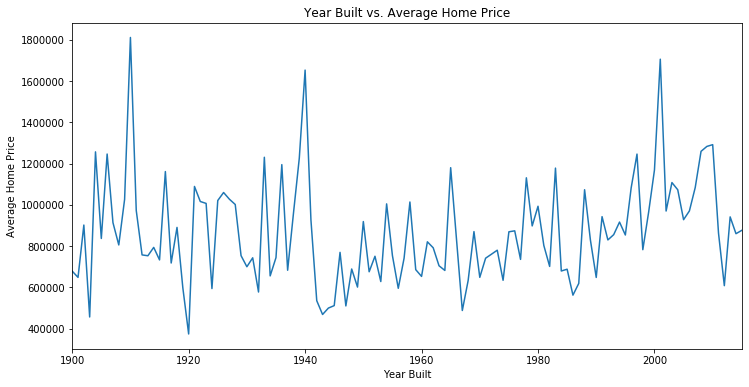

In [45]:
built = df.groupby('yr_built')['price'].mean()
built.plot(figsize = (12,6))
plt.title('Year Built vs. Average Home Price')
plt.xlabel('Year Built')
plt.ylabel('Average Home Price')



~1910 & ~1940's and 2000's are among the highest sold homes. Suprisingly yr_build and yr_renovation had correlations of 0.053965 & 0.117858 with the housing sales prices.
Homes in the 1910's were inspired by the Victotian style architecture. These houses can make a profit by being sold to historical societies or used in movie sets. After more data is collected, an more indepth analysis can be done on home renovation and its relationship to home price.

Text(0, 0.5, 'Average Home Price')

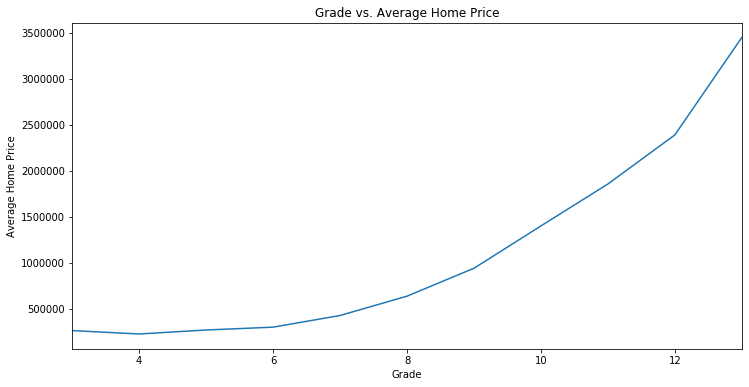

In [48]:
price_gr = df.groupby('grade')['price'].mean()
price_gr.plot(figsize = (12,6))
plt.title('Grade vs. Average Home Price')
plt.xlabel('Grade')
plt.ylabel('Average Home Price')

As grade increases, the price of the home increases. Grade and Price had a (positive) correlation coefficiant of 0.667964. We assumed this relationship between grade and price, but wanted to be sure. 